# Part 4

### Step 1 
Generate 100 datasets, each with 50 instances. Each data point is
drawn from the Gaussian distribution N(67,3.8). That is, the true
mean is μ = 67 and the standard deviation is σ = 3.8.
Hint: You can generate a random two-dimensional array with the
shape 100 ×50 in one go.

In [155]:
import numpy as np

dataset = np.random.normal(67, 3.8, (100, 50))


### Step 2 and 3)
Compute sample mean and sample standard deviation for each data set\
Calculate the confidence intervals using the population standard deviation

In [156]:
data_means = np.mean(dataset, axis=1)
data_std = np.std(dataset, axis=1, ddof=1)

data_error = 1.96 * 3.8 / np.sqrt(50)


### Step 4
Plot and count number of datasets where known mean is outside the confidence interval

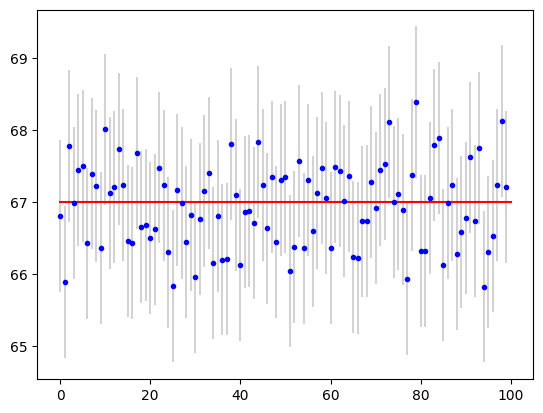

In [157]:
import matplotlib.pyplot as plt

plt.errorbar(np.arange(100), data_means, data_error, fmt = '.k', mfc = "blue", mec = "blue",
             ecolor= "lightgray")

plt.plot(np.linspace(0,100,2), np.array([67,67]) , color = "red")
plt.show()

In [158]:
def count_intervals(means, known_mean, known_std, data_in_each):
    outside_confidence_interval = 0
    num_data = len(means)
    
    for i in range(num_data):
        if (means[i] + 1.96*(known_std / np.sqrt(data_in_each))) < known_mean or (means[i] - 1.96 * (known_std/ np.sqrt(data_in_each))) > known_mean:
            outside_confidence_interval += 1
            
    return outside_confidence_interval

count_intervals(data_means, 67, 3.8, 50)

7

### Step 5
Generate 10,000 datasets, 50 data points each. Count how many lie outside. Compute the percent of intervals that do not contain the true mean. Repeat 10 times. Print the 10 percentages.

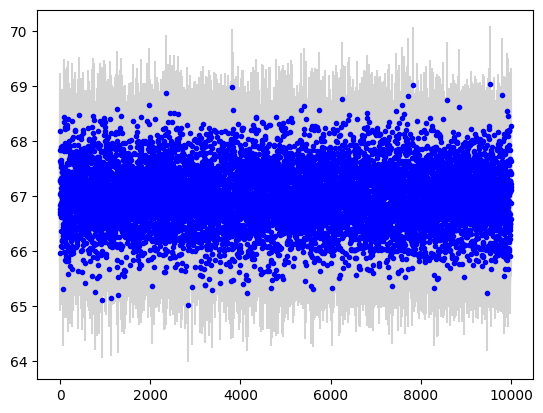

In [159]:
num_datasets = 10000
dataset = np.random.normal(67, 3.8, (num_datasets, 50))

data_means = np.mean(dataset, axis=1)
data_std = np.std(dataset, axis=1, ddof=1)

data_error = 1.96 * 3.8 / np.sqrt(50)

plt.errorbar(np.arange(num_datasets), data_means, data_error, fmt = '.k', mfc = "blue", mec = "blue",
             ecolor= "lightgray")

plt.plot(np.linspace(0,num_datasets,2), np.array([67,67]) , color = "red")
plt.show()

In [160]:
num_datasets = 10000
percentages = []

for _ in range(10):
    dataset = np.random.normal(67, 3.8, (num_datasets, 50))

    data_means = np.mean(dataset, axis=1)
    data_std = np.std(dataset, axis=1, ddof=1)

    percentages.append(count_intervals(data_means, 67, 3.8, 50) / num_datasets)
    
percentages

[0.0484,
 0.0485,
 0.0496,
 0.0534,
 0.0508,
 0.0503,
 0.0484,
 0.0491,
 0.0509,
 0.0515]

### Step 6
Repeat for 100,000 datasets

In [161]:
num_datasets = 100000
percentages = []

for _ in range(10):
    dataset = np.random.normal(67, 3.8, (num_datasets, 50))

    data_means = np.mean(dataset, axis=1)
    data_std = np.std(dataset, axis=1, ddof=1)

    percentages.append(count_intervals(data_means, 67, 3.8, 50) / num_datasets)
    
percentages

[0.04942,
 0.05041,
 0.04995,
 0.04902,
 0.04997,
 0.0507,
 0.04877,
 0.04898,
 0.04989,
 0.05042]

### Step 7
Use Student's t-distribution by using the sample standard deviation to replace the true standard deviation (3.8).

In [162]:
def count_intervals_student(means, stds, known_mean, data_in_each):
    outside_confidence_interval = 0
    num_data = len(means)
    
    for i in range(num_data):
        if (means[i] + 1.96*(stds[i] / np.sqrt(data_in_each))) < known_mean or (means[i] - 1.96 * (stds[i]/ np.sqrt(data_in_each))) > known_mean:
            outside_confidence_interval += 1
            
    return outside_confidence_interval


In [163]:
num_datasets = 100000
num_datapoints = 10
percentages = []

for _ in range(10):
    dataset = np.random.normal(67, 3.8, (num_datasets, num_datapoints))

    data_means = np.mean(dataset, axis=1)
    data_std = np.std(dataset, axis=1, ddof=1)

    percentages.append(count_intervals_student(data_means, data_std, 67, num_datapoints) / num_datasets)
    
percentages

[0.08202,
 0.08133,
 0.08088,
 0.0817,
 0.08206,
 0.08156,
 0.08106,
 0.08167,
 0.08165,
 0.08258]

### Step 9
Use Student's t-distribution, replacing our constant of 1.96 with 2.262 due to the look up table and a degree of freedom of 9 (10-1).

In [164]:
def count_intervals_student(means, stds, known_mean, data_in_each):
    outside_confidence_interval = 0
    num_data = len(means)
    
    for i in range(num_data):
        if (means[i] + 2.262*(stds[i] / np.sqrt(data_in_each))) < known_mean or (means[i] - 1.96 * (stds[i]/ np.sqrt(data_in_each))) > known_mean:
            outside_confidence_interval += 1
            
    return outside_confidence_interval


In [165]:
num_datasets = 100000
num_datapoints = 10
percentages = []

for _ in range(10):
    dataset = np.random.normal(67, 3.8, (num_datasets, num_datapoints))

    data_means = np.mean(dataset, axis=1)
    data_std = np.std(dataset, axis=1, ddof=1)

    percentages.append(count_intervals_student(data_means, data_std, 67, num_datapoints) / num_datasets)
    
percentages

[0.06621,
 0.0662,
 0.06759,
 0.06587,
 0.06715,
 0.06568,
 0.06547,
 0.06597,
 0.06565,
 0.06707]